<a href="https://colab.research.google.com/github/z-gursky/Penguins-/blob/main/Penguins.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This dataset comes from [Palmer Archipelago Penguin Dataset](https://www.kaggle.com/parulpandey/palmer-archipelago-antarctica-penguin-data) and is great for anyone who wants to practice exloritory data anaysis with plenty of visualizations. 

First I will set up my environment and load any packages that I may need. I will be impoerting my data from  a csv file from desktop and while in google colab, google.colab allows this to easily be done. 

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
%matplotlib inline
import io

In [ ]:
# import my data 
from google.colab import files
data_to_load = files.upload()

Saving penguins.csv to penguins.csv


In [ ]:
penguins = pd.read_csv(io.BytesIO(data_to_load['penguins.csv']))

Let's think about what the head() function does and why it will be used to first look at the data we just imported. The head() function will show us the first few rows of the dateframe, the default is 5 but we can manually enter how many to display in the parenthesis. 

Allowing us to look at the first few rows will show us if everything is formatted consistantly or if anything seems a bit off (soemtimes empty spaces). This is always a great first step to start formatting and cleaning the data, but later down the road you may run into problems that you do not see right away with head(). 

Another common function that is used similar to head() that you can try for practice is tail(). This function will do the opposite of head() and display that last 5 rows of the dataframe. 

In [ ]:
penguins.head()

,studyName,Sample Number,Species,Region,Island,Stage,Individual ID,Clutch Completion,Date Egg,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo),Comments
0,PAL0708,1,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A1,Yes,11/11/2007,39.1,18.7,181.0,3750.0,MALE,NaN,NaN,Not enough blood for isotopes.
1,PAL0708,2,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A2,Yes,11/11/2007,39.5,17.4,186.0,3800.0,FEMALE,8.94956,-24.69454,NaN
2,PAL0708,3,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N2A1,Yes,11/16/2007,40.3,18.0,195.0,3250.0,FEMALE,8.36821,-25.33302,NaN
3,PAL0708,4,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N2A2,Yes,11/16/2007,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Adult not sampled.
4,PAL0708,5,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N3A1,Yes,11/16/2007,36.7,19.3,193.0,3450.0,FEMALE,8.76651,-25.32426,NaN


Looking at the above dataset that is displayed using the head() fucntion we can see a lot of columns that may not be necessary. The .drop function allows us to easily get rid of columns or labels that we may not want. Make sure you state axis=1 if dropping a column and change inplace to either True or False depending if you want a copy (inplace=False) or to change the dataframe entirely (inplace = True)

In [ ]:
# drop the columns we will not be working with
penguins.drop(['studyName', 'Sample Number', 'Individual ID', 'Clutch Completion', 'Date Egg', "Sex", 
               'Delta 15 N (o/oo)', 'Delta 13 C (o/oo)', 'Comments'], axis=1, inplace=True)

Describe is a great function to quickly explore our data and see stats such as mean, min, max and percentile ranges. 

In [ ]:
penguins.describe()

,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g)
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


What data will we be exploring? 

Species: This data consistes of three different penguin species, Adelie Penguin (Pygoscelis adeliae), Chinstrap penguin (Pygoscelis antarctica), and Gentoo penguin (Pygoscelis papua)

Region: These penguins come from the Anvers region in Antarctica

Culmen Length: In simple terms the Culmen length is the penguins bills length measured in milameters (see pictures below taken from google)

Culmen Depth: In simple terms the Culmen depth is the penguins bills depth measured in milameters (see pictures below taken from google)

Flipper Length: Length of the flipper measures in milameters (see pictures below taken from google)

Pictures below to see Culmen and flipper of a penguin. 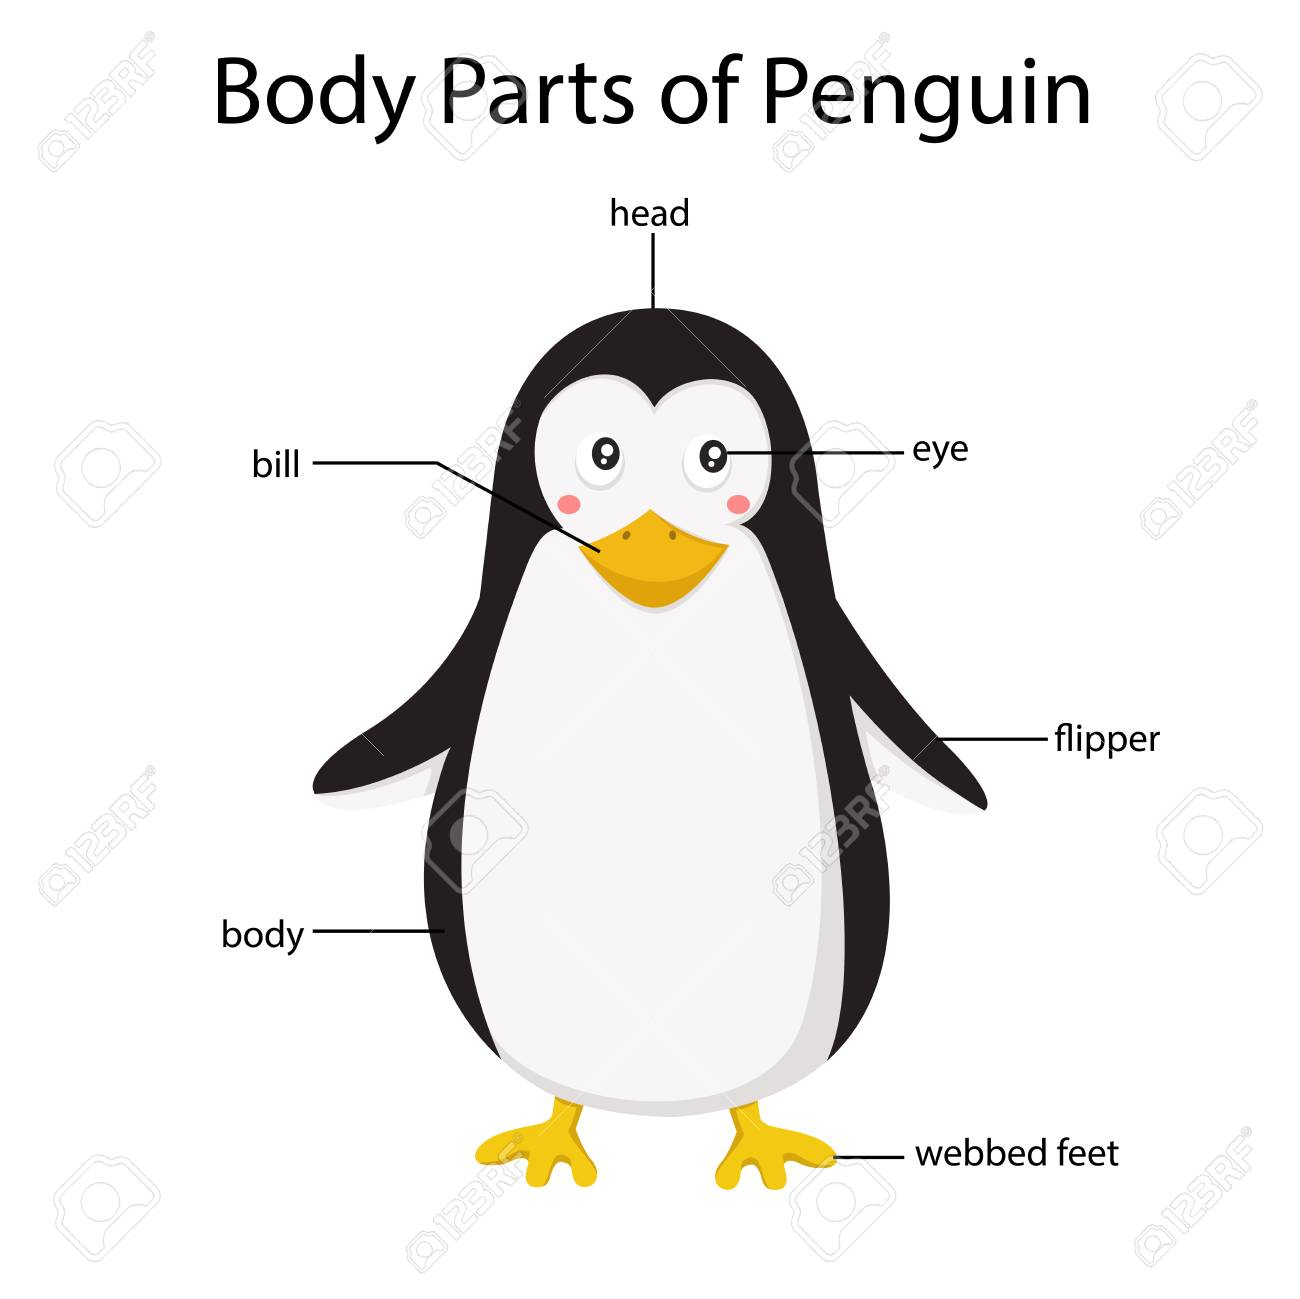

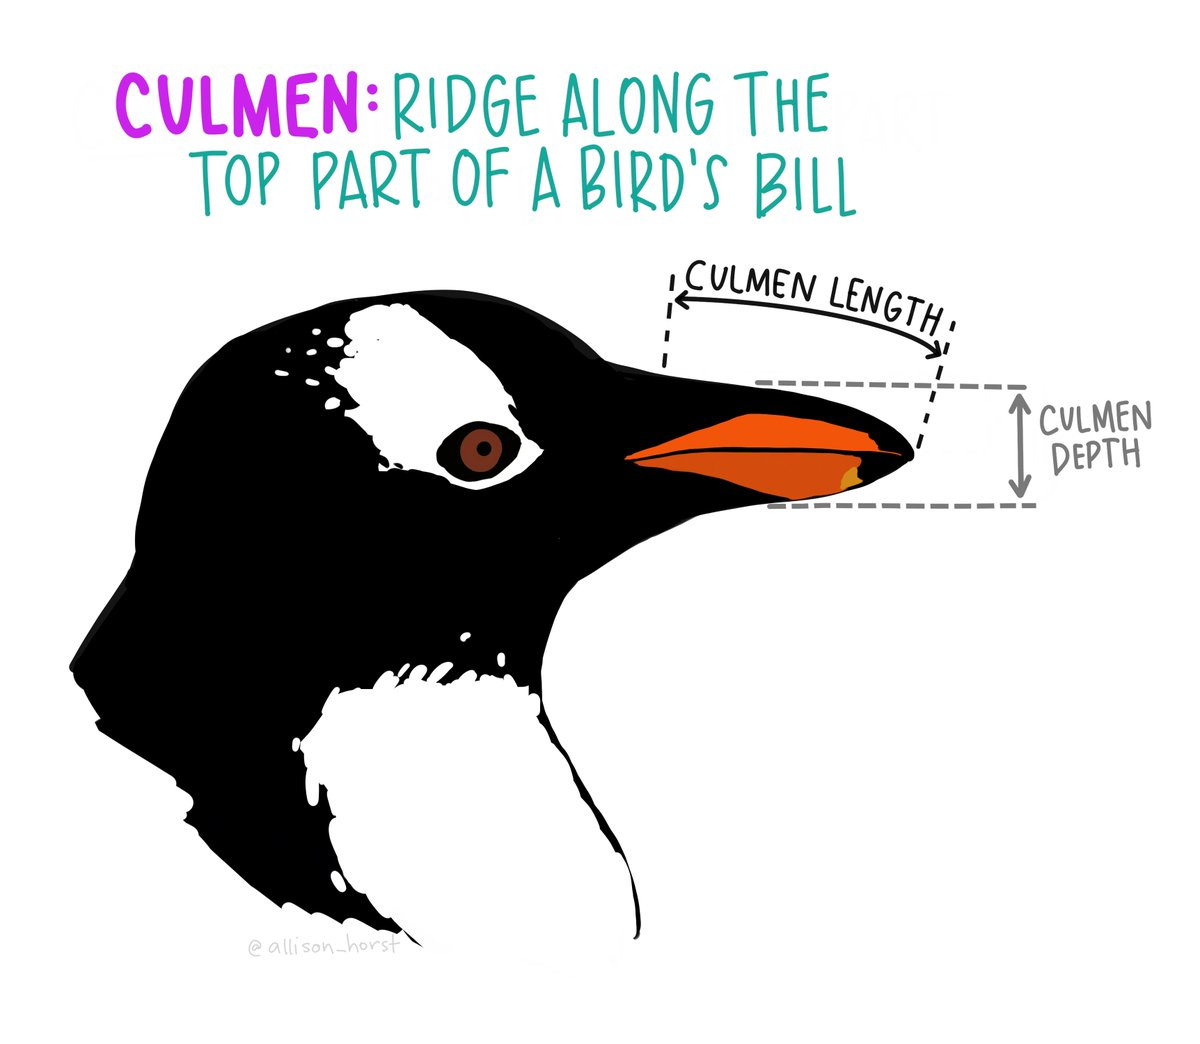

**Data Cleaning**

We need to indentify potential problems with the data we're working with. Below are some potential problems we may run into: 


*   Duplicate entries 
*   Data that is irrelevant
*   Structual problems, such as integers stores as text
*   Inconsistant formatte of data fields 
*   Extreme values you may not be able to explain
*   Missing data

The isnull() function will return True if any field is left blank.Lets begin with this.  






In [ ]:
penguins.isnull()

,Species,Region,Island,Stage,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g)
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,True,True,True,True
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
339,False,False,False,False,True,True,True,True
340,False,False,False,False,False,False,False,False
341,False,False,False,False,False,False,False,False
342,False,False,False,False,False,False,False,False


What is going on here? Looking at the dataframe is shows that there are no missing values, is the data already cleaned? Below we will set up a simple function that will show us if the above is correct (expressed in percent of data missing by each column). 

In [ ]:
def missing_data(df):
  df = df.isnull().sum()*100/df.isnull().count()
  print(df)
missing_data(penguins)

Species                0.000000
Region                 0.000000
Island                 0.000000
Stage                  0.000000
Culmen Length (mm)     0.581395
Culmen Depth (mm)      0.581395
Flipper Length (mm)    0.581395
Body Mass (g)          0.581395
dtype: float64


After setting up a quick function we can see there are missing values. The isnull() function will tell us if there are missing values but if there are other problematic areas, such as "--" it will still show up as False (nothing missing). We also are only looking at a small amount of the data, there may be values missing elsewhere in the dataset. Below we will run through a simple set-up to see if there are any other problematic area besides missing values before dealing with them. 

In [ ]:
# handeling missing values

# Print all values that cannot be converted to float
for column_name in ["Culmen Length (mm)", "Culmen Depth (mm)",
                    "Flipper Length (mm)", "Body Mass (g)"]:
    print("These are the problematic values for the variable: {}".format(column_name))
    for value in penguins[column_name]:
        try:
            float(value)
        except:
            print(value)

These are the problematic values for the variable: Culmen Length (mm)
These are the problematic values for the variable: Culmen Depth (mm)
These are the problematic values for the variable: Flipper Length (mm)
These are the problematic values for the variable: Body Mass (g)


The above confirms that the problematic values are missing and we can treat them a few different ways. 

For this dataset and working with continous data I will use imputation to treat the missing values. We will be filling the missing values with the mean that should give us a good representation and be able to move forward with our anaylsis. 

In [ ]:
# Impute the data with mean
penguins["Culmen Length (mm)"].fillna(penguins["Culmen Length (mm)"].mean(), inplace=True)
penguins["Culmen Depth (mm)"].fillna(penguins["Culmen Depth (mm)"].mean(), inplace=True)
penguins["Flipper Length (mm)"].fillna(penguins["Flipper Length (mm)"].mean(), inplace=True)
penguins["Body Mass (g)"].fillna(penguins["Body Mass (g)"].mean(), inplace=True)
missing_data(penguins)

Species                0.0
Region                 0.0
Island                 0.0
Stage                  0.0
Culmen Length (mm)     0.0
Culmen Depth (mm)      0.0
Flipper Length (mm)    0.0
Body Mass (g)          0.0
dtype: float64


**Heat Map**

A heat map is a great way to show the precision in statistcs and display visually the correlations between variables. Another way to describe the numerical representations you will see below are the *correlation coefficient* which is a linear relationship between two contious variables. 

Correlations range from -1 to 1 with -1 indicates a perfect negative relationship and 1 a perfect relationship. A numerical representation on 0 would indiacte no relationship. 

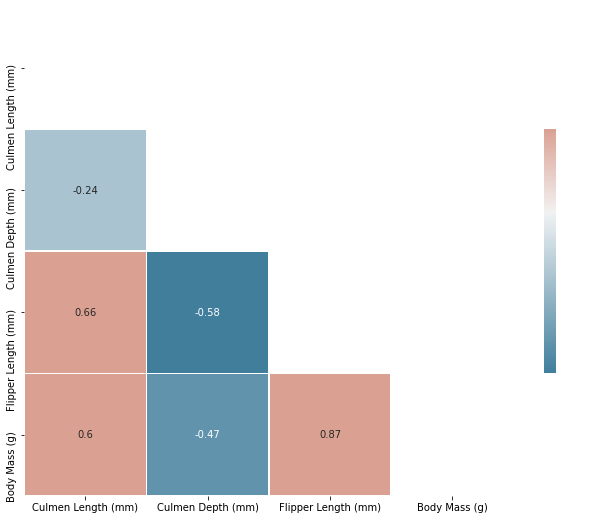

In [ ]:
def heat_map(df):
  # heat matrix between variables
  corr = df.corr()

  # Generate a mask for the upper triangle
  mask = np.triu(np.ones_like(corr, dtype=bool))

  # Set up the matplotlib figure
  f, ax = plt.subplots(figsize=(11, 9))

  # Generate a custom diverging colormap
  cmap = sns.diverging_palette(230, 20, as_cmap=True)

  # Draw the heatmap with the mask and correct aspect ratio
  with plt.rc_context({'xtick.color':'white', 'ytick.color':'white', 
                      'axes.labelcolor': 'white'}):
    sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
                square=True, annot=True, linewidths=.5, cbar_kws={"shrink": .5})
heat_map(penguins)

In [ ]:
# Covariance

print('Covariance:')
penguins.cov()

Covariance:


,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g)
Culmen Length (mm),29.633252,-2.519457,50.082029,2590.398957
Culmen Depth (mm),-2.519457,3.877069,-16.118414,-743.012250
Flipper Length (mm),50.082029,-16.118414,196.578837,9767.130837
Body Mass (g),2590.398957,-743.012250,9767.130837,639381.041890


## **Visualizations**

Vizualizations is an important skill and plays a key role in being able to translate your data visually and make it appealing to the end user. Looking at a dataframe alone can be quite the task to draw conclusions but using visualizations we can summarize the data quickly. 

## **Countplot**

Countplot is great to visually display the spread of data. You can also easily ass in the percentage of data for each group to see if everything is balanced before moving forward. 

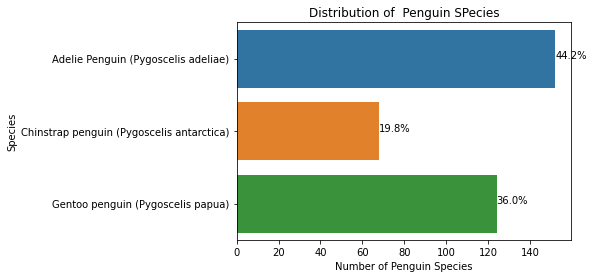

In [ ]:
ax = sns.countplot(y="Species", data=penguins)
plt.title('Distribution of  Penguin SPecies')
plt.xlabel('Number of Penguin Species')

total = len(penguins['Species'])
for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_width()/total)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y))

plt.show()

In [ ]:
# replace longer name with shorter to easily read on visuals
penguins['Species'].replace(to_replace='Adelie Penguin (Pygoscelis adeliae)', 
                            value="Adelie Penguin", inplace=True)
penguins['Species'].replace(to_replace='Chinstrap penguin (Pygoscelis antarctica)', 
                            value="Chinstrap penguin", inplace=True)
penguins['Species'].replace(to_replace='Gentoo penguin (Pygoscelis papua)', 
                            value="Gentoo penguin", inplace=True)



Boxplot:
Barplot:
Striplot:
Swarmplot:
Violenplot:

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-package

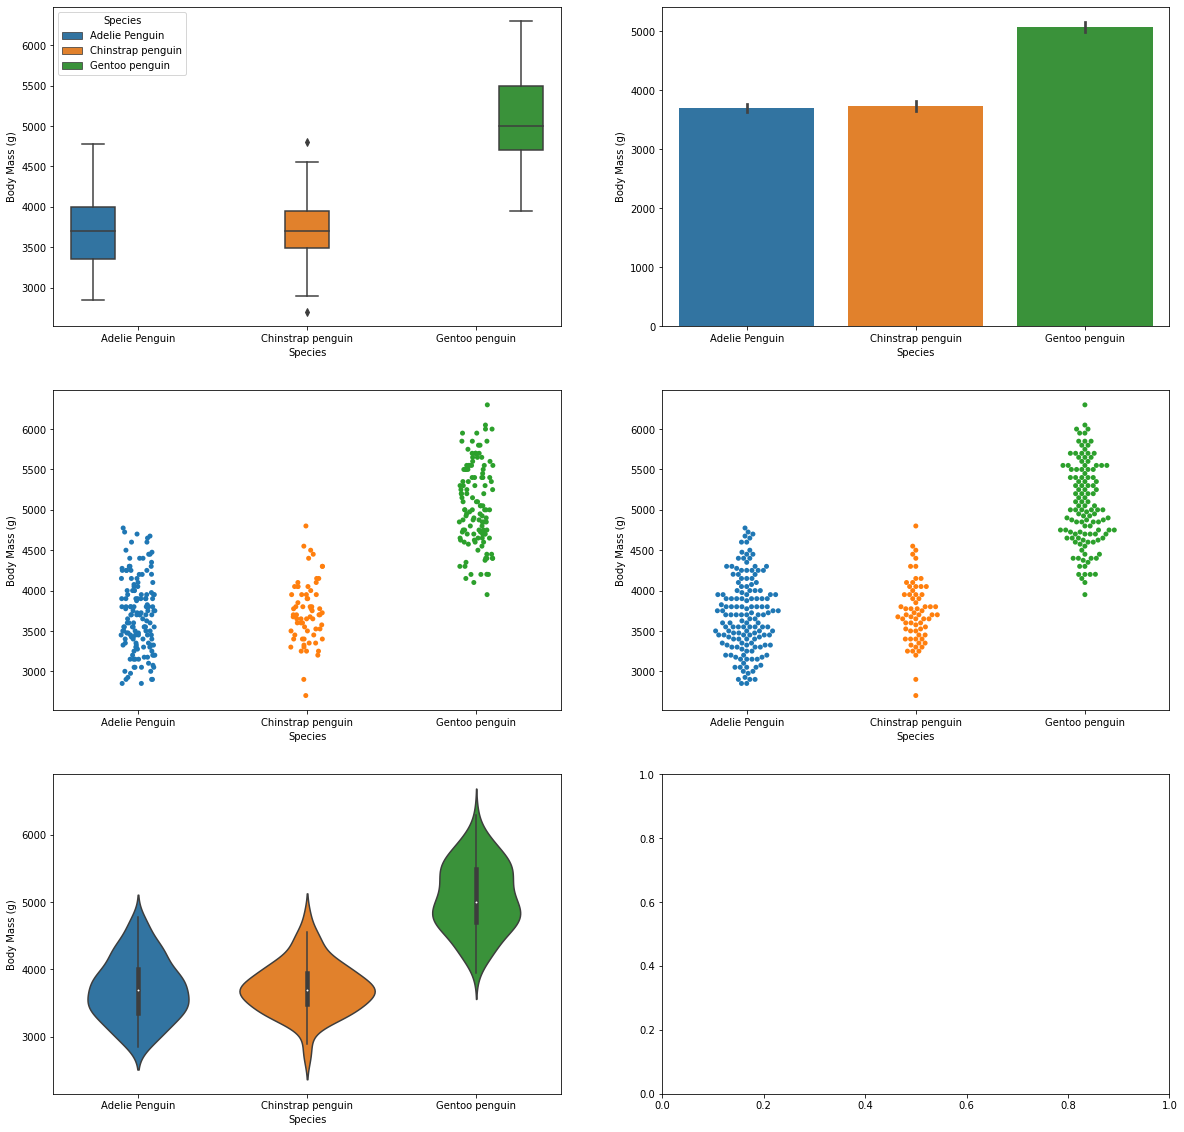

In [ ]:
fig, ax2 = plt.subplots(3, 2, figsize=(20, 20))
sns.boxplot(x= "Species", y="Body Mass (g)", data=penguins,ax=ax2[0][0], hue="Species")
sns.barplot(penguins['Species'], penguins['Body Mass (g)'],ax=ax2[0][1])
sns.stripplot(penguins['Species'], penguins['Body Mass (g)'], jitter=True,ax=ax2[1][0])
sns.swarmplot(penguins['Species'], penguins['Body Mass (g)'], ax=ax2[1][1])
sns.violinplot(penguins['Species'], penguins['Body Mass (g)'], ax=ax2[2][0])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-package

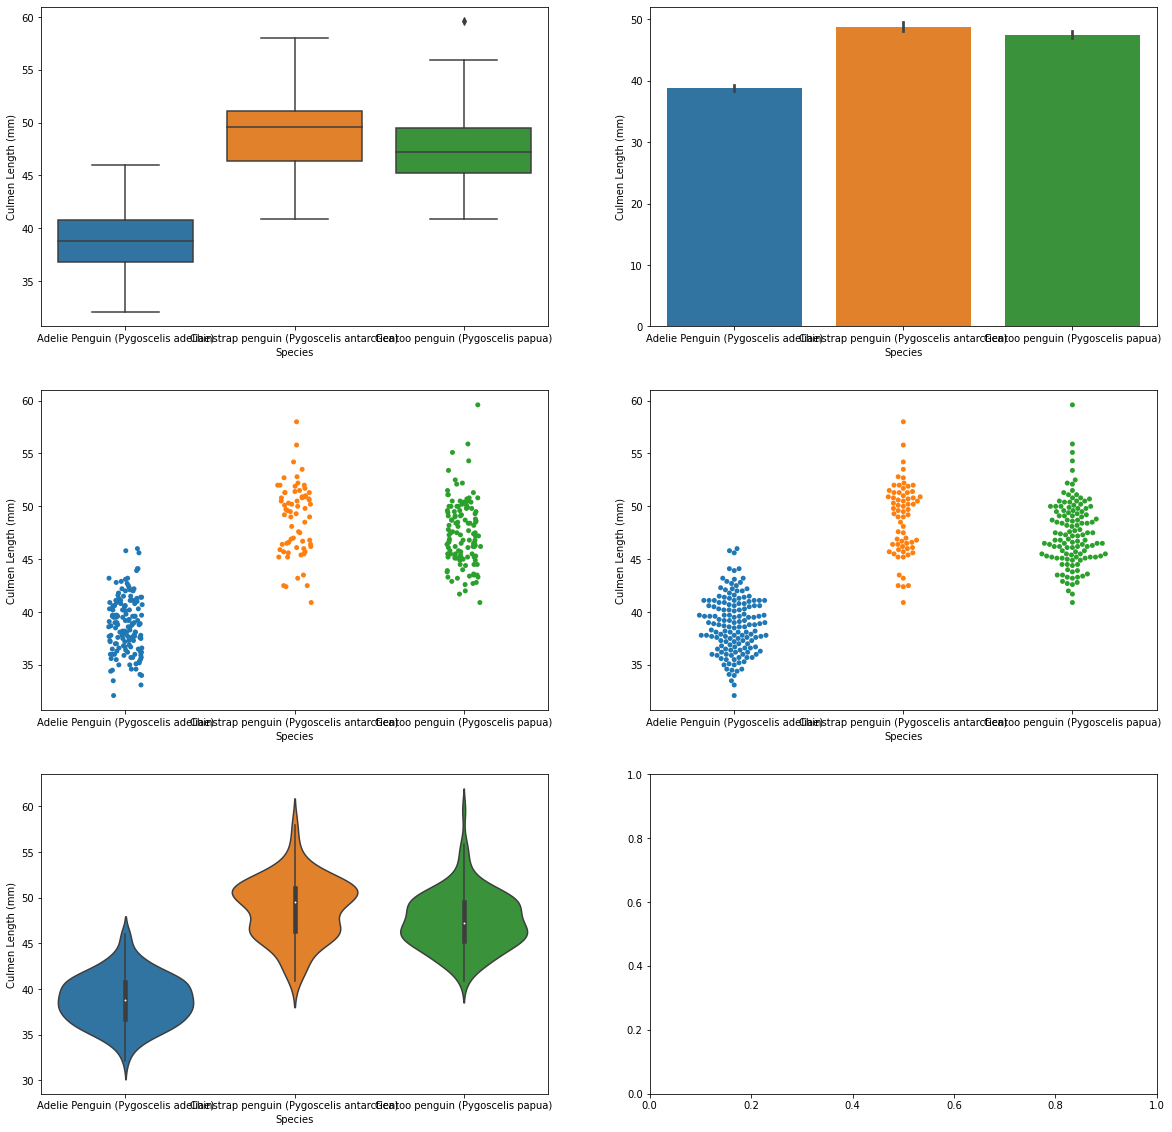

In [ ]:
fig, ax2 = plt.subplots(3, 2, figsize=(20, 20))
sns.boxplot(x="Species", y="Culmen Length (mm)", data=penguins,ax=ax2[0][0])
sns.barplot(penguins['Species'], penguins['Culmen Length (mm)'],ax=ax2[0][1])
sns.stripplot(penguins['Species'], penguins['Culmen Length (mm)'], jitter=True,ax=ax2[1][0])
sns.swarmplot(penguins['Species'], penguins['Culmen Length (mm)'], ax=ax2[1][1])
sns.violinplot(penguins['Species'], penguins['Culmen Length (mm)'], ax=ax2[2][0])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-package

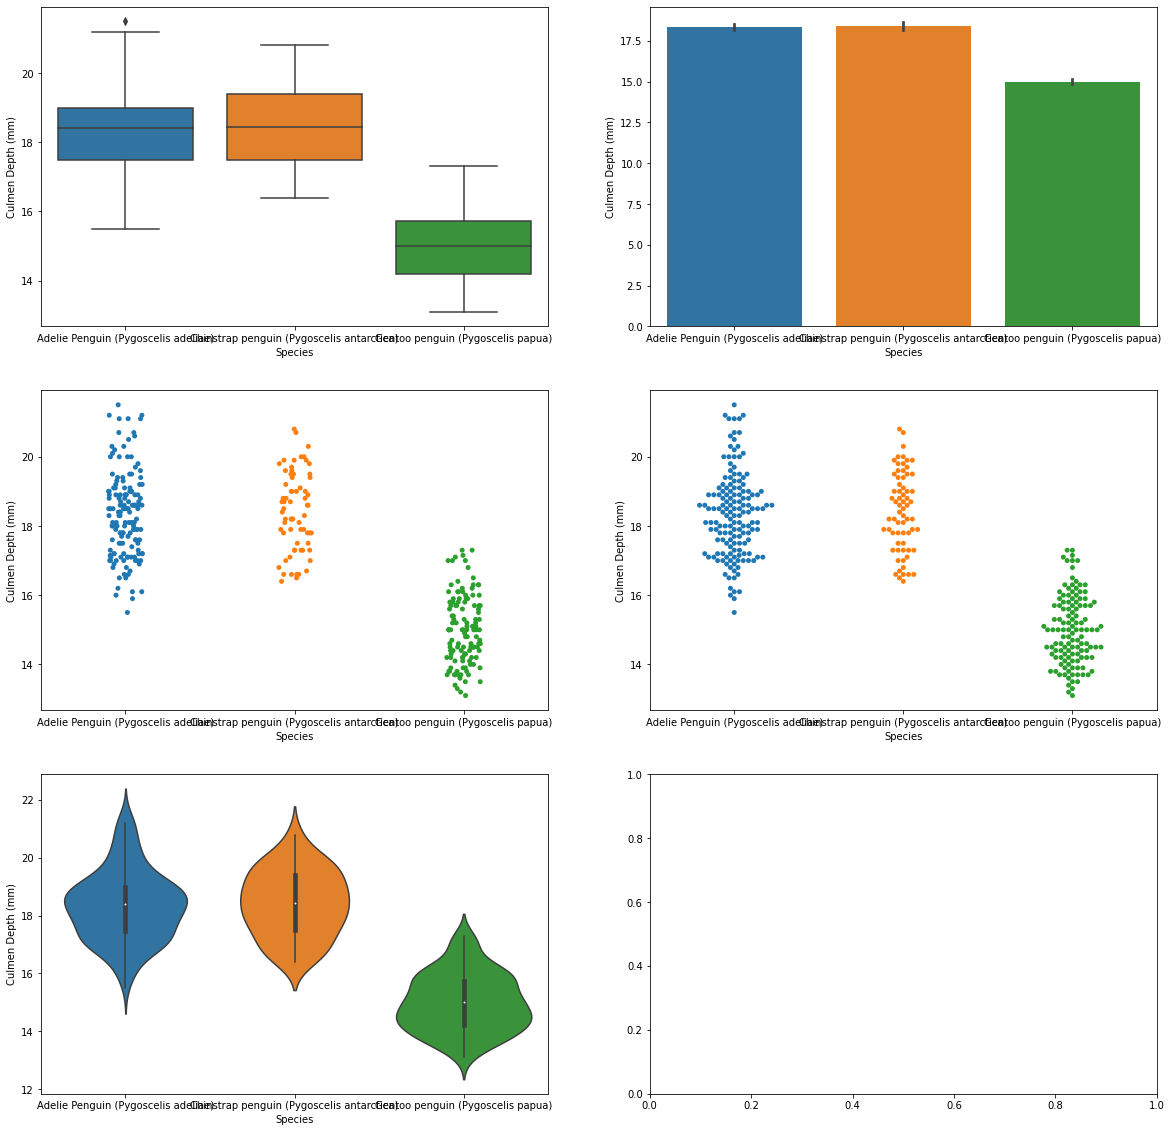

In [ ]:
fig, ax2 = plt.subplots(3, 2, figsize=(20, 20))
sns.boxplot(x="Species", y="Culmen Depth (mm)", data=penguins,ax=ax2[0][0])
sns.barplot(penguins['Species'], penguins['Culmen Depth (mm)'],ax=ax2[0][1])
sns.stripplot(penguins['Species'], penguins['Culmen Depth (mm)'], jitter=True,ax=ax2[1][0])
sns.swarmplot(penguins['Species'], penguins['Culmen Depth (mm)'], ax=ax2[1][1])
sns.violinplot(penguins['Species'], penguins['Culmen Depth (mm)'], ax=ax2[2][0])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-package

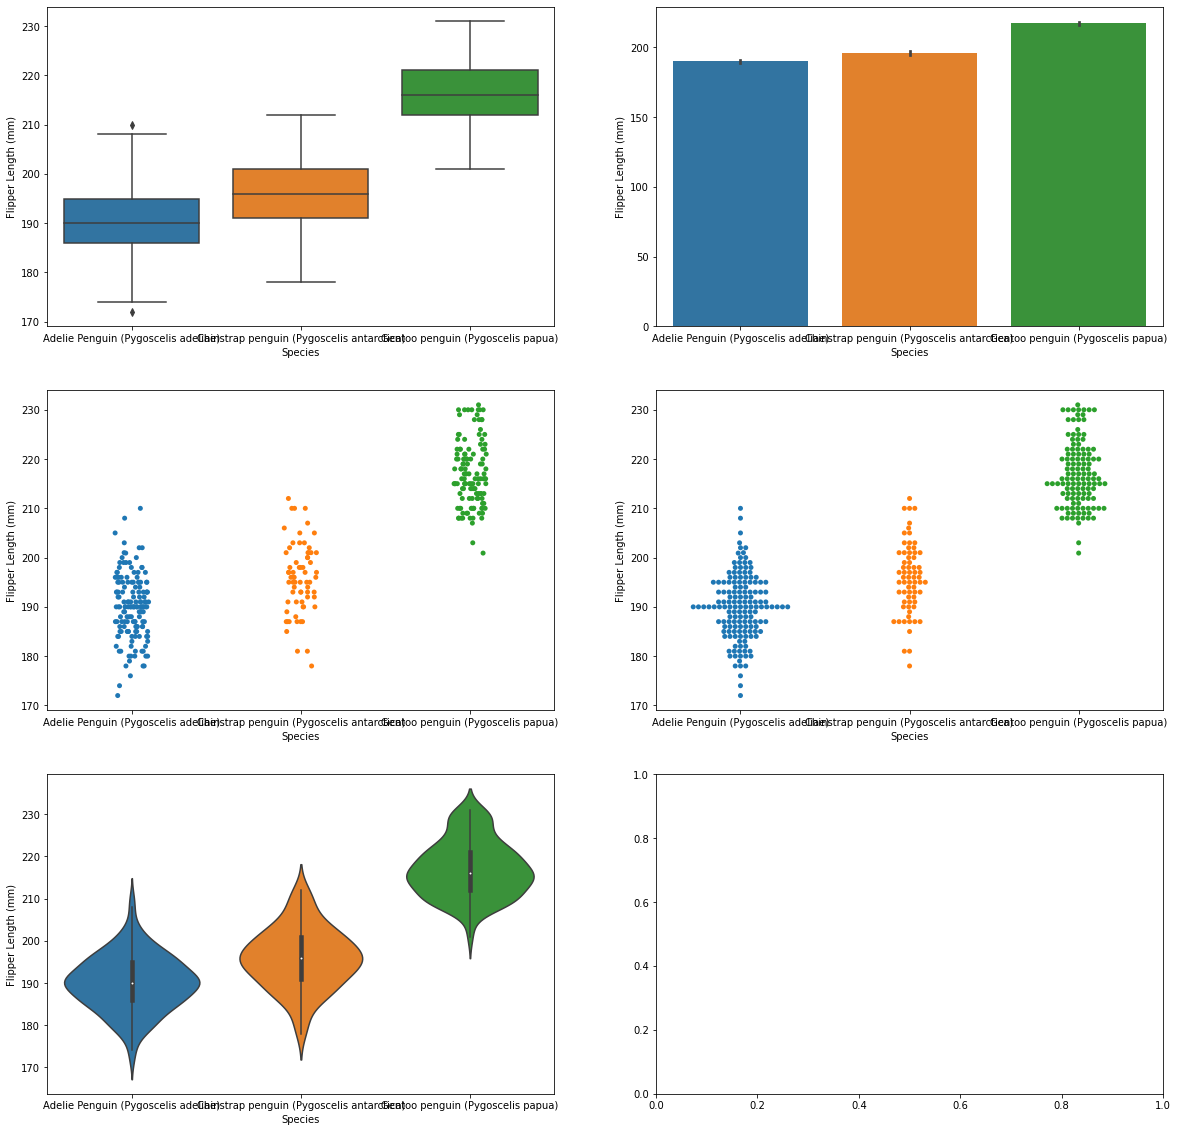

In [ ]:
fig, ax2 = plt.subplots(3, 2, figsize=(20, 20))
sns.boxplot(x="Species", y="Flipper Length (mm)", data=penguins,ax=ax2[0][0])
sns.barplot(penguins['Species'], penguins['Flipper Length (mm)'],ax=ax2[0][1])
sns.stripplot(penguins['Species'], penguins['Flipper Length (mm)'], jitter=True,ax=ax2[1][0])
sns.swarmplot(penguins['Species'], penguins['Flipper Length (mm)'], ax=ax2[1][1])
sns.violinplot(penguins['Species'], penguins['Flipper Length (mm)'], ax=ax2[2][0])

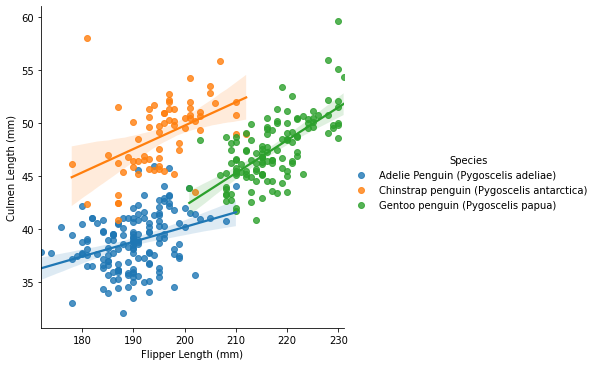

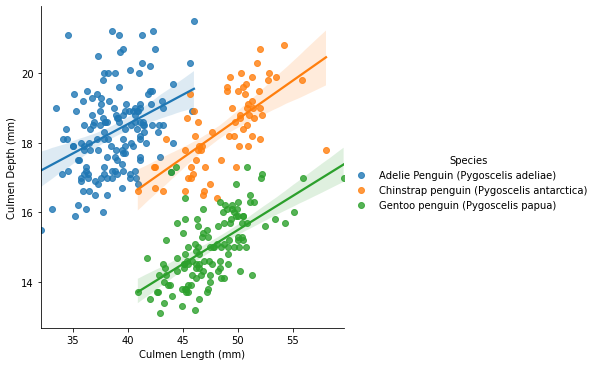

In [ ]:

sns.lmplot(x='Flipper Length (mm)',y='Culmen Length (mm)',data=penguins,hue='Species')

sns.lmplot(x='Culmen Length (mm)',y='Culmen Depth (mm)',data=penguins,hue='Species')